# Aula 5

In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Ex. 1

In [22]:
img1 = cv2.imread('Figuras/Fig0333a.tif', cv2.IMREAD_GRAYSCALE)

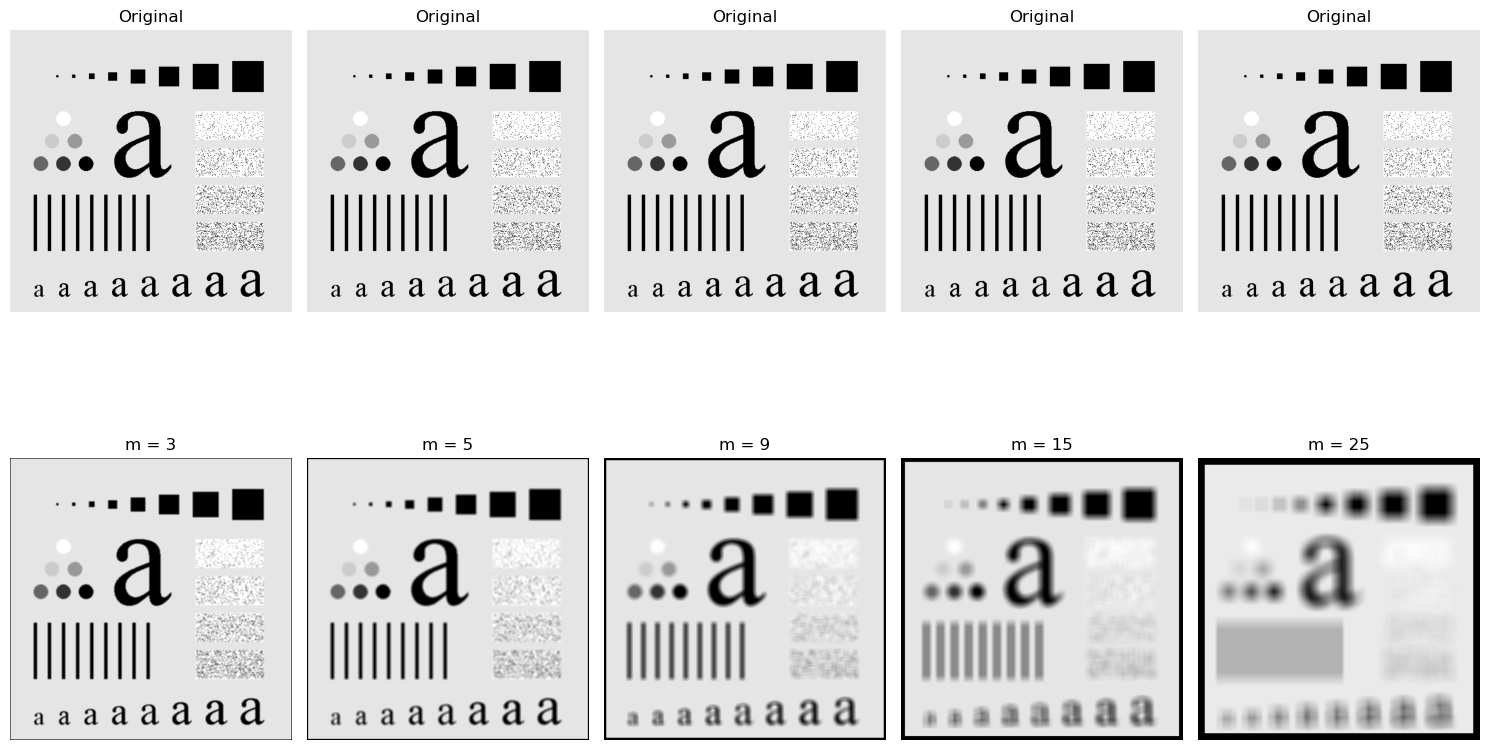

In [36]:
# Kernel sizes to test
m_values = [3, 5, 9, 15, 25]

# Initialize figure for displaying results
plt.figure(figsize=(15, 10))

for idx, m in enumerate(m_values, 1):
    d = int((m-1)/2)
    kernel = np.ones((m, m), dtype='float') / m**2

    # Get image dimensions
    (h, w) = img1.shape

    # Initialize output image
    img_out = np.zeros((h, w), dtype='uint8')

    # Apply mean filter
    for i in range(d, h-d):
        for j in range(d, w-d):
            secao_img = img1[i-d:i+d+1, j-d:j+d+1]
            prod_img_kernel = secao_img * kernel
            somatorio = prod_img_kernel.sum()
            img_out[i, j] = somatorio.astype('uint8')

    # Plot results
    plt.subplot(2, len(m_values), idx)
    plt.imshow(img1, cmap='gray')
    plt.title(f'Original')
    plt.axis('off')

    plt.subplot(2, len(m_values), idx + len(m_values))
    plt.imshow(img_out, cmap='gray')
    plt.title(f'm = {m}')
    plt.axis('off')

plt.tight_layout()
plt.show()

## Ex. 2

In [37]:
img2 = cv2.imread('Figuras/Fig0334a.tif', cv2.IMREAD_GRAYSCALE)

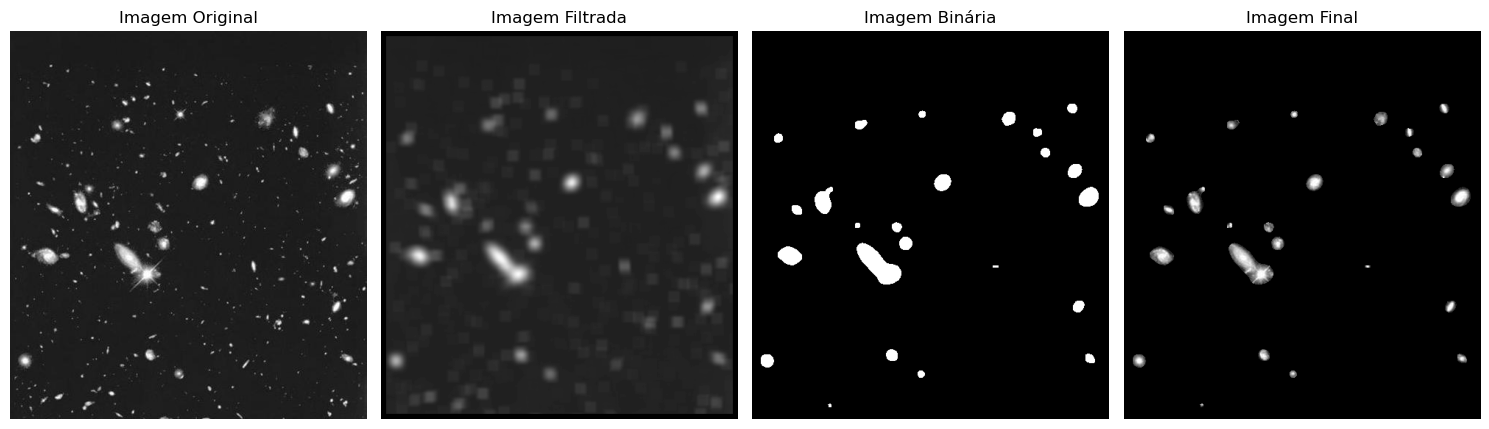

In [48]:
# montagem do Kernel
m = 15
d = int((m-1)/2)
kernel = np.ones((m,m), dtype = 'float') / m**2

# inicialização da figura processada
(h, w) = img2.shape

img_filter = np.zeros((h, w), dtype = 'uint8')

# varredura da imagem

for i in range(d, h-d):
    for j in range(d, w-d):
        secao_img = img2[i-d:i+d+1, j-d:j+d+1]

        prod_img_kernel = secao_img * kernel
        somatorio = prod_img_kernel.sum()

        img_filter[i, j] = somatorio.astype('uint8')

img_bin = np.where(img_filter > img_filter.max()*0.35, 255, 0)

# now for each white pixel in img_bin, get the same pixel in img2 and create img_out
img_out = np.where(img_bin == 255, img2, 0)

# plotagem das imagens
plt.figure(figsize=(15, 10))
plt.subplot(1,4,1)
plt.imshow(img2, cmap = 'gray')
plt.title('Imagem Original')
plt.axis('off')

plt.subplot(1,4,2)
plt.imshow(img_filter, cmap = 'gray')
plt.title('Imagem Filtrada')
plt.axis('off')

plt.subplot(1,4,3)
plt.imshow(img_bin, cmap = 'gray')
plt.title('Imagem Binária')
plt.axis('off')

plt.subplot(1,4,4)
plt.imshow(img_out, cmap = 'gray')
plt.title('Imagem Final')
plt.axis('off')

plt.tight_layout()
plt.show()